In [17]:
import sys
import numpy as np
import json
import matplotlib.pyplot as plt
from sklearn import linear_model 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

We'll be pulling the correlation and formation energy data from our casm project using 'casm query -k 'corr,formation_energy' -j -o outputfile.json

TODO: Need to change this to output from casm query -k -j -o outputfile.txt

In [18]:
#filenames
#add object to figure out which ECIs you want selected
#ex. ECI_on = [1 2 3 4 5]
#have something to pick which corr's to turn on
#easier to load JSON data in instead

In [19]:
#data_file = sys.argv[1] #output of "casm query -k 'corr,formation_energy,comp' -j -o outputfile.txt"
data_file = 'output_data.json'
corr_file = 'output_corr.json'
energy_file = 'output_energies.json'
with open(corr_file) as f:
    corr_data = json.load(f)
    f.close()
with open(energy_file) as f:
    energy_data = json.load(f)
    f.close()
with open(data_file) as f:
    data = json.load(f)
    f.close()

Just some testing to make sure things are importing correctly

In [20]:
print(data)

[{'comp': [[1.0]], 'configname': 'SCEL1_1_1_1_0_0_0/0', 'corr': [[1.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0

#the old code
correlation_matrix_file = sys.argv[1] #output of "casm query -k 'corr' -o outputfile.txt"
formation_energies_file = sys.argv[2] #output of "casm query -k 'formation_energy' -o outputfile_energy.txt"

Splitting the data into training and test sets (test_size indicates what fraction of the data becomes the test set, setting a value for random_state allows for repeatability)

In [21]:
data_train, data_test = train_test_split(data, test_size=0.1, random_state=10)
corr_train = np.empty((len(data_train),len(data_train[0]['corr'])))
energy_train = np.empty((len(data_train),1))
comp_train = np.empty((len(data_train),1))
corr_test = np.empty((len(data_test),len(data_test[0]['corr'])))
energy_test = np.empty((len(data_test),1))
comp_test = np.empty((len(data_test),1))

In [22]:
#data_train[0]["comp"]

In [23]:
for i in range(0,len(data_train)):
    corr_train[i] = np.array(data_train[i]['corr']).transpose()
    energy_train[i] = data_train[i]["formation_energy"]
    comp_train[i] = data_train[i]["comp"][0]
for i in range(0,len(data_test)):
    corr_test[i] = np.array(data_test[i]['corr']).transpose()
    energy_test[i] = data_test[i]["formation_energy"]
    comp_test[i] = data_test[i]["comp"][0]

Setting up linear regression model
Fitting first to the training set (90% of the data)
reg.coef_ is the ECIs for this fit

In [24]:
reg = linear_model.LinearRegression()
reg.fit(corr_train,energy_train)
reg.coef_

array([[ 1.69353108e+05, -8.98678490e+07, -6.75120902e+08,
        -2.84309593e+07,  8.30390417e+08,  4.79944050e+08,
        -5.77076109e+08,  1.15209332e+08, -6.01416551e+08,
        -2.14793764e+08,  4.02240770e+08,  6.54361759e+08,
         1.57147646e-03,  3.93260717e-02, -2.36742366e-02,
         3.30665577e-02, -2.37461124e-02, -7.65835941e-02,
         5.99071383e-04,  1.70806199e-02,  3.39072049e-02,
         4.48641181e-03, -8.47601891e-03,  8.11820077e+08,
         1.05689512e+09,  9.28765235e+08, -1.34346684e+09,
        -1.70058597e+09, -2.64561216e+07,  1.81571071e+08,
         6.89688767e+08,  1.26113854e+09, -1.76336159e+08,
        -4.83643657e+08, -6.17840400e+08,  2.30418665e+08,
        -1.73752723e+09,  1.45927558e+08, -7.42096716e+08,
        -4.87921097e+08,  9.24007185e+08, -1.24969707e+09,
         2.86464265e+08, -3.30715856e+08,  5.11645421e+06,
        -5.54910229e+08,  5.06062751e+08, -5.24180622e+08,
        -8.42125808e+08, -3.59625367e+08, -4.20600434e+0

Printing r^2 value of the training fit

In [25]:
print(reg.score(corr_train,energy_train))

0.9742560133589466


Now predicting the energies for the test set

In [26]:
energy_predict = reg.predict(corr_test)

Calculating mean squared error & r^2 value

In [27]:
print('Mean squared error: %.2f' % mean_squared_error(energy_test,energy_predict))

print('Coefficient of determination (r^2): %.2f'
      % r2_score(energy_test, energy_predict))

Mean squared error: 0.00
Coefficient of determination (r^2): 0.95


In [28]:
#print(energy_predict)

In [29]:
#print(energy_test)

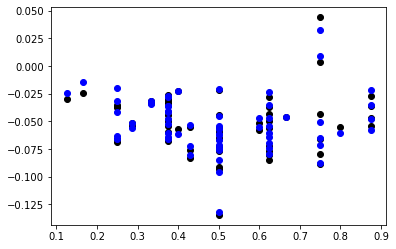

In [32]:
plt.scatter(comp_test, energy_test,  color='black')
plt.scatter(comp_test, energy_predict, color='blue')


In [31]:
len(comp_test)

63